# Confusion Matrix

In [9]:
# Importing necessary libraries
from sklearn.datasets import load_breast_cancer
#from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib as plt

# Loading the breast cancer data set
diabetes_data = load_breast_cancer()

# Creating independent and dependent variables
X = diabetes_data.data
y = diabetes_data.target

# Splitting the data into training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

# Training a binary classifier using Random Forest Algorithm with default hyperparameters

classifier = LogisticRegression(random_state=18)
classifier.fit(X_train, y_train)

# Here X_test, y_test are the test data points
predictions = classifier.predict(X_test)

Train Data: (455, 30), (455,)
Train Data: (114, 30), (114,)


c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# Accuracy

#Importing all necessary libraries
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

Accuracy of the classifier is: 0.9473684210526315


[[39  2]
 [ 4 69]]


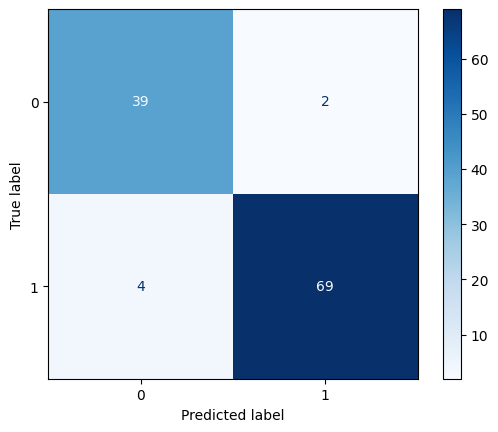

In [28]:
# importing all necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, predictions))

cm = confusion_matrix(y_test, predictions)

# plot_confusion_matrix function is used to visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


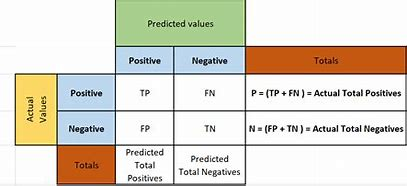

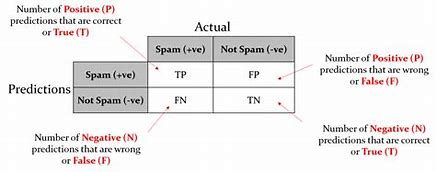

In [ ]:
#The accuracy of the classifier can be calculated from the confusion using the below formula:

# Accuracy = (TP + TN) / (TP + FP + TN + FN)

# The accuracy of our classifier is: (69+39) / (69+39+2+4) = 0.947 = 94.7%

In [12]:
# Importing all necessary libraries
from sklearn.metrics import precision_score

# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

Precision Score of the classifier is: 0.971830985915493


In [13]:
# Importing all necessary libraries
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

Recall Score of the classifier is: 0.9452054794520548


In [14]:
# Importing all necessary libraries
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

F1 Score of the classifier is: 0.9583333333333334


AUC for our classifier is: 0.9889742733043769


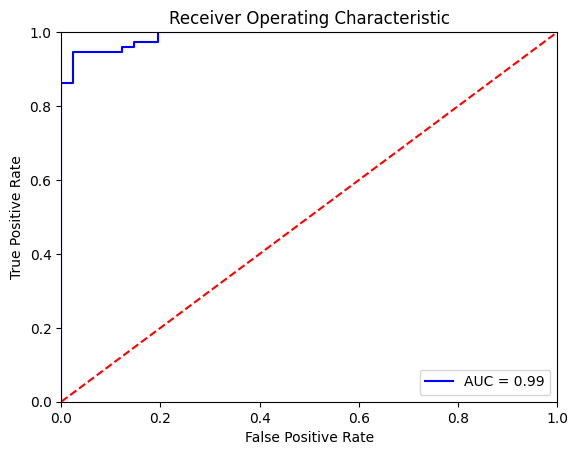

In [15]:
# Importing all necessary libraries
from sklearn.metrics import roc_curve, auc

class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        41
           1       0.97      0.95      0.96        73

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



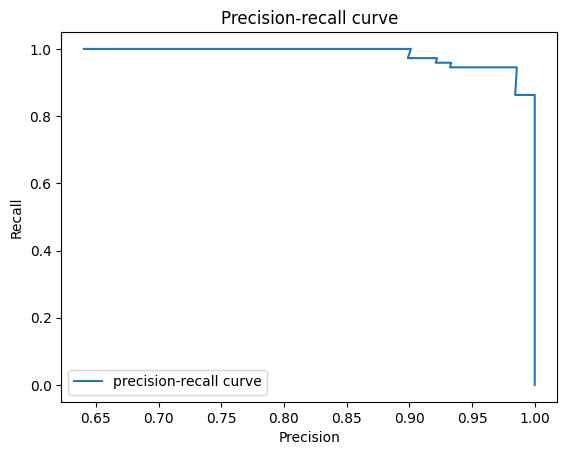

In [21]:
from sklearn.metrics import precision_recall_curve

probs = classifier.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test,probs)

plt.plot(precision, recall, label='precision-recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.legend(loc="lower left")
plt.show()

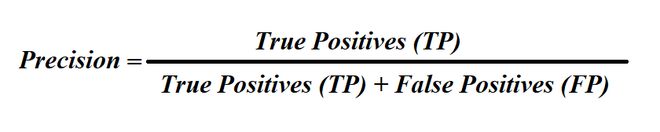

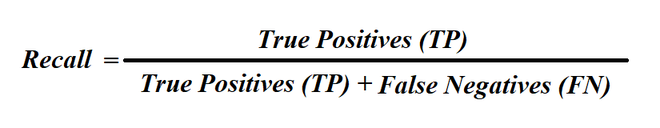

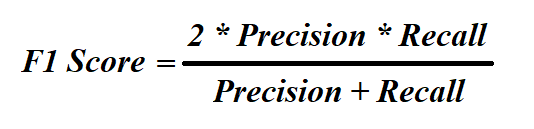